In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# 1 IMPORT DATA

1.1 LOAD AND CHECK DATA

In [33]:
df_movies = pd.read_csv('movies1.csv')

In [34]:
df_movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# 2 DATA CLEANING

2.1 CHECK MISSING VALUES

In [48]:
for c in df_movies.columns:
    pct_null = np.mean(df[c].isnull()) * 100
    count_null = df[c].isnull().sum()
    print('{} - {} - {}%'.format(c, count_null, pct_null))

name - 0 - 0.0%
rating - 77 - 1.004173187271779%
genre - 0 - 0.0%
year - 0 - 0.0%
released - 2 - 0.02608242044861763%
score - 3 - 0.03912363067292645%
votes - 3 - 0.03912363067292645%
director - 0 - 0.0%
writer - 3 - 0.03912363067292645%
star - 1 - 0.013041210224308816%
country - 3 - 0.03912363067292645%
budget - 2171 - 28.31246739697444%
gross - 189 - 2.464788732394366%
company - 17 - 0.2217005738132499%
runtime - 4 - 0.05216484089723526%


In [50]:
df_movies[df_movies['released'].isnull()] # Films where released is null

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [51]:
df_movies.loc[df_movies['name'].isin(pd.Series(['Saw: The Final Chapter'])),'released']='October 29, 2010 (United States)'
df_movies.loc[df_movies['name'].isin(pd.Series(['The Wolfman'])),'released']='February 12, 2010 (United States)'
print('Null values in released:', str(df_movies['released'].isnull().sum()))

Null values in released: 0


2.2 DATA TYPES

In [52]:
df_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

2.3 CHECK DUPLICATES

In [53]:
df_movies.drop_duplicates()
print('Number of rows after dropping duplicates:', str(len(df_movies)))

Number of rows after dropping duplicates: 7668



2.4 CHECKING VALUES 

In [54]:
df_movies['year_check'] = np.where((df_movies['released'].str.split(', ').str[-1].astype(str).str[:4] == df_movies['year'].astype(str)), True, False)
print(df_movies['year_check'].value_counts())
print(df_movies[['name', 'year', 'released','year_check']][~df_movies['year_check']][:20])

True     6323
False    1345
Name: year_check, dtype: int64
                                 name  year  \
8                         Superman II  1980   
11             The Gods Must Be Crazy  1980   
21                      Heaven's Gate  1980   
33   Cattle Annie and Little Britches  1980   
40           The Watcher in the Woods  1980   
49                 Lion of the Desert  1980   
54                      City of Women  1980   
59                          Hangar 18  1980   
62                       It's My Turn  1980   
78                            Babylon  1980   
79                         Windwalker  1980   
86              La Cage aux Folles II  1980   
91                Mantis Fist Fighter  1980   
96                      The Evil Dead  1981   
97                            Porky's  1981   
101                         Mad Max 2  1981   
102                          Das Boot  1981   
104                        Possession  1981   
116                    On Golden Pond  1981   
1

It was discovered that in 1347 records, the year in the year column is different from the actual year in the released column. For the sake of testing if the code was valid, we also displayed 20 initial rows with the value "False."


In order to resolve this problem, we will take the value from the released column, construct a new column with the right year, and print the top 10 rows of the result.

In [55]:
df_movies['release_year'] = df_movies['released'].str.replace('\D+', '').str[-4:].astype('int64')
print(df_movies[['name', 'released', 'release_year']][:10])

                                             name  \
0                                     The Shining   
1                                 The Blue Lagoon   
2  Star Wars: Episode V - The Empire Strikes Back   
3                                       Airplane!   
4                                      Caddyshack   
5                                 Friday the 13th   
6                              The Blues Brothers   
7                                     Raging Bull   
8                                     Superman II   
9                                 The Long Riders   

                            released  release_year  
0      June 13, 1980 (United States)          1980  
1       July 2, 1980 (United States)          1980  
2      June 20, 1980 (United States)          1980  
3       July 2, 1980 (United States)          1980  
4      July 25, 1980 (United States)          1980  
5        May 9, 1980 (United States)          1980  
6      June 20, 1980 (United States)         

<ipython-input-55-d3943b4d71c4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movies['release_year'] = df_movies['released'].str.replace('\D+', '').str[-4:].astype('int64')


Next, I will obtain summary statistics for the numeric columns to further investigate the data.Then the data will then be cleaned if any unexpected patterns show up after

In [56]:
print('Mean values:')
print(df_movies[['release_year', 'score', 'votes', 'budget', 'gross', 'runtime']].mean())

print('\nMinimum values:')
print(df_movies[['release_year', 'score', 'votes', 'budget', 'gross', 'runtime']].min())

print('\nMaximum values:')
print(df_movies[['release_year', 'score', 'votes', 'budget', 'gross', 'runtime']].max())

Mean values:
release_year    2.000626e+03
score           6.390411e+00
votes           8.810850e+04
budget          3.558988e+07
gross           7.850054e+07
runtime         1.072616e+02
dtype: float64

Minimum values:
release_year    1980.0
score              1.9
votes              7.0
budget          3000.0
gross            309.0
runtime           55.0
dtype: float64

Maximum values:
release_year    2.020000e+03
score           9.300000e+00
votes           2.400000e+06
budget          3.560000e+08
gross           2.847246e+09
runtime         3.660000e+02
dtype: float64


According to the output above, the data spans the years 1980 to 2020, the scores vary from 1 to 10, and a typical movie lasts 107 minutes. Although there is a significant difference between the highest and lowest grossing, vote totals, and budgets, this could be explained by how well-liked each movie was. I will examine the movie that produced this value as well as the other movies with the longest duration since the longest runtime is 366 minutes, or nearly 6 hours:

In [58]:
print(df_movies[['name', 'year', 'runtime']].sort_values(by=['runtime'], ascending=False)[:5])

                            name  year  runtime
4396           The Best of Youth  2003    366.0
1218               Little Dorrit  1987    357.0
2280                  Gettysburg  1993    271.0
2888                      Hamlet  1996    242.0
1868  The Beautiful Troublemaker  1991    238.0


In [59]:
print('rating')
print(np.sort(pd.unique(df_movies['rating'].astype(str).values)))
print('\ngenre')
print(np.sort(pd.unique(df_movies['genre'].astype(str).values)))
print('\ndirector')
print(np.sort(pd.unique(df_movies['director'].astype(str).values)))
print('\ncountry')
print(np.sort(pd.unique(df_movies['country'].astype(str).values)))
print('\ncompany')
print(np.sort(pd.unique(df_movies['company'].astype(str).values))[:20])
print(np.sort(pd.unique(df_movies['company'].astype(str).values))[-20:])

rating
['Approved' 'G' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA'
 'TV-PG' 'Unrated' 'X' 'nan']

genre
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'Western']

director
['A.R. Murugadoss' 'Aamir Khan' 'Aaron Blaise' ... 'Élie Chouraqui'
 'Éric Rohmer' 'Éva Gárdos']

country
['Argentina' 'Aruba' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Canada'
 'Chile' 'China' 'Colombia' 'Czech Republic' 'Denmark'
 'Federal Republic of Yugoslavia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Lebanon' 'Libya' 'Malta'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Panama' 'Philippines'
 'Poland' 'Portugal' 'Republic of Macedonia' 'Romania' 'Russia' 'Serbia'
 'South Africa' 'South Korea' 'Soviet Union' 'Spain' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Turk

The majority of the data appears to be clear and accurate, however there is a discrepancy in the rating column: a movie that is not rated is the same as an unrated movie, thus I will combine the categories.

In [60]:
df_movies.loc[df_movies['rating'].astype(str).str.contains('Not Rated'), 'rating'] = 'Unrated'
print('rating')
print(np.sort(pd.unique(df_movies['rating'].astype(str).values)))

rating
['Approved' 'G' 'NC-17' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA' 'TV-PG' 'Unrated'
 'X' 'nan']


We are prepared to begin data analysis now that the data has been cleaned.

# 3 DATA ANALYSIS

I will check which variables have the highest correlation with the films' gross. The starting hypothesis is that the films with a high budget and a high score tend to have a higher gross. To check whether this assumption is correct, I will generate a correlation matrix.

[Text(0.5, 1.0, 'Correlation Matrix')]

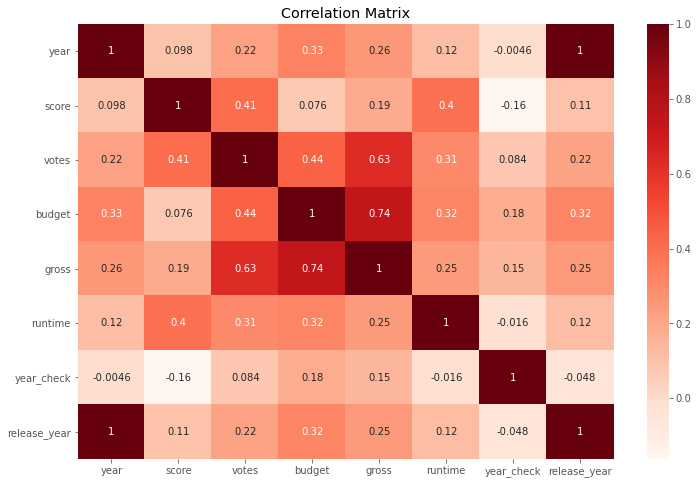

In [62]:
correlation = df_movies.corr()
sns.heatmap(correlation, annot=True, cmap='Reds').set(title='Correlation Matrix')

The strongest positive link between gross and budget and votes (0.74 and 0.63, respectively). This relationship makes sense since, in order for a project to succeed, it must create enough revenue to pay for the money invested in it and turn a profit. With a broader audience, high-grossing movies will receive more reviews, leading to higher ratings. According to the data, a movie's popularity rarely reflects its quality based on score, albeit this is also influenced by the quantity of voters. The sample size is smaller since fewer people voted for lesser grossing movies, which might result in skewed results.

The relationship can be Visualized with scatter plots

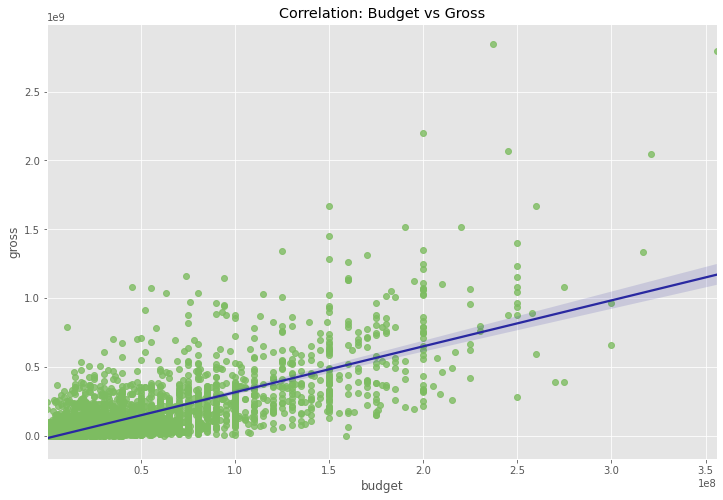

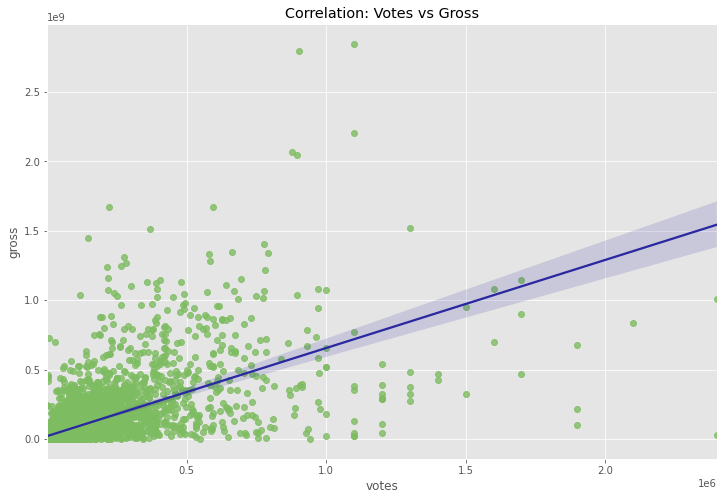

In [67]:
sns.regplot(data=df_movies, x='budget', y='gross', scatter_kws={"color": "#7dbc61"}, line_kws={"color": "#2928a1"}).set(title='Correlation: Budget vs Gross')
plt.show()

sns.regplot(data=df_movies, x='votes', y='gross', scatter_kws={"color": "#7dbc61"}, line_kws={"color": "#2928a1"}).set(title='Correlation: Votes vs Gross')
plt.show()

The scatter plots provide more evidence of the positive connection between gross and the two variables, but it is clear that there are outliers in the data, which makes it difficult to use the Pearson correlation coefficient as a trustworthy technique of data analysis. Although it is outside the purview of this research, it is advised that other analytical techniques be used in order to develop a more thorough knowledge.

I will use the box plot to see the outliers clearly

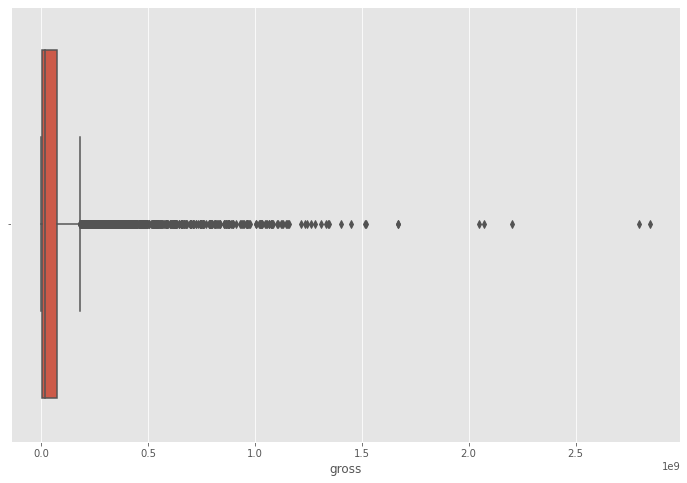

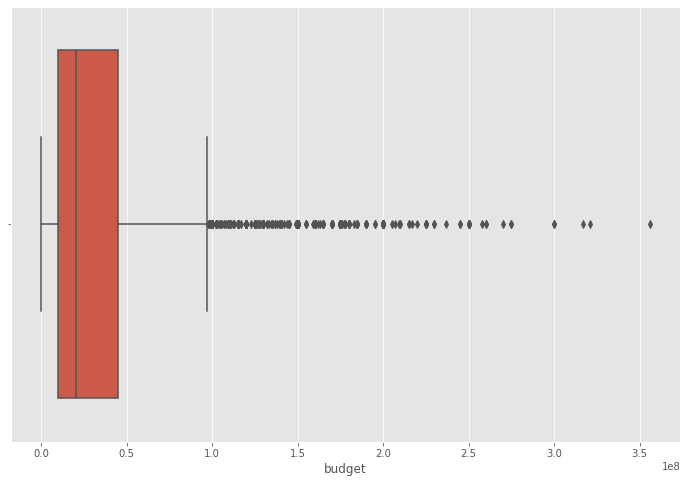

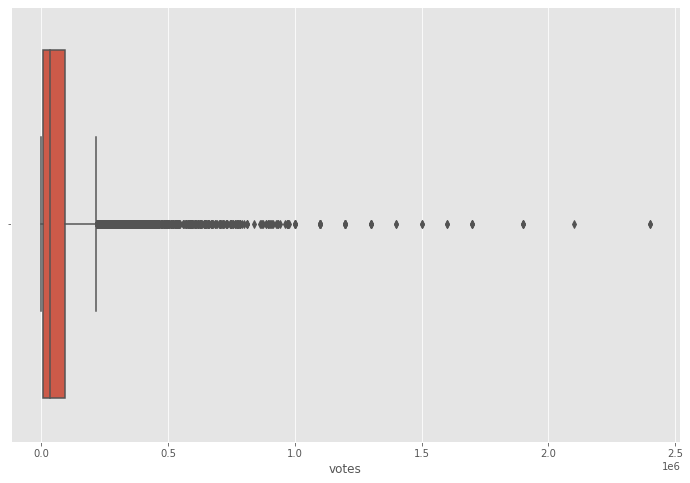

In [68]:
sns.boxplot(x=df_movies['gross'])
plt.show()
sns.boxplot(x=df_movies["budget"])
plt.show()
sns.boxplot(x=df_movies["votes"])
plt.show()

Next, it will be interesting to historical tendencies,mainly to check whether there were any changes in budget, gross, and scores between 1980-2020. which is the time period that this dataset covers.

In [69]:
df_aggregated = df_movies.groupby(df_movies['release_year']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'], 'name': ['count']})

df_aggregated.head()

,budget,gross,score,name
,sum,sum,mean,count
release_year,,,,
1980,4.117500e+08,2.329467e+09,6.265000,80
1981,7.216000e+08,2.253569e+09,6.231068,103
1982,8.722850e+08,3.440553e+09,6.292188,128
1983,9.006106e+08,2.707176e+09,6.080000,145
1984,1.137476e+09,3.631932e+09,6.150955,157


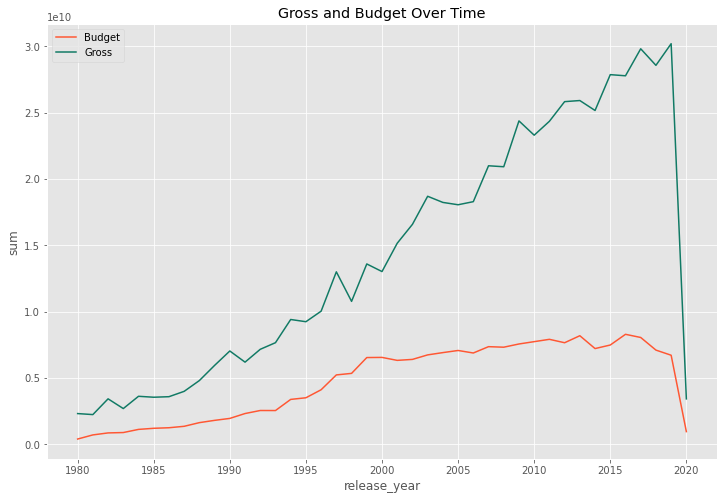

In [76]:
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['budget']['sum'], color='#FF5733')
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['gross']['sum'], color='#117A65')
plt.title('Gross and Budget Over Time')
plt.legend(labels=["Budget","Gross"])
plt.show()

The graph above shows that, for the most part, the film business grew steadily, but that in 2020 it witnessed a dramatic decrease in both budget and revenue. This most likely had something to do with the COVID-19 epidemic, which caused fewer movies to be made and forced theaters to close their doors or only let in half the audience.

 I can check the total number of films released each year by plotting it on a line chart

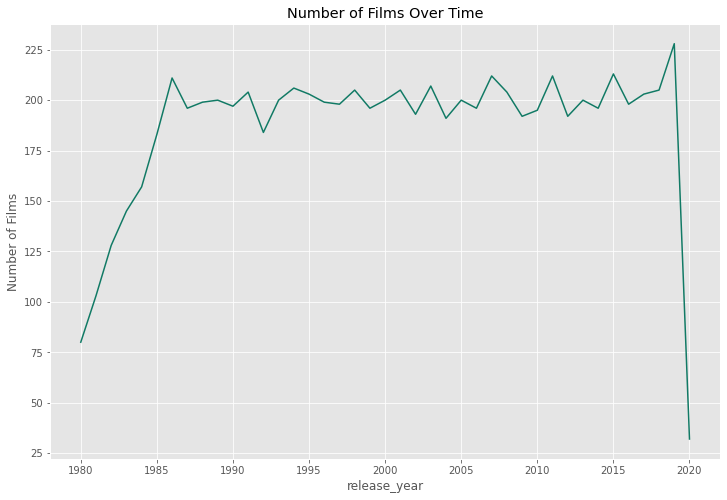

In [80]:
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['name']['count'], color='#117A65')
plt.ylabel('Number of Films')
plt.title('Number of Films Over Time')
plt.show()

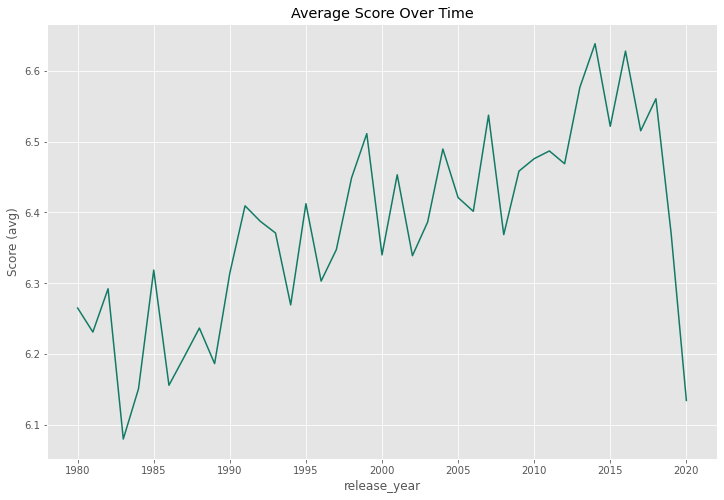

In [81]:
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['score']['mean'], color='#117A65')
plt.ylabel('Score (avg)')
plt.title('Average Score Over Time')
plt.show()

On this graph, there is a lot more variation, even if the overall trend was upward until a sharp decrease in 2020. Therefore, during the first year of the epidemic, not only were fewer movies released, but their quality (or at least audience satisfaction) was generally inferior.
When they become available, the data from the succeeding years will be interesting to observe. How long it will take for the film business to recover and resume its pre-covid levels is a matter of time. It might be a challenging voyage because expenses have likely gone up for film production and because people's spending patterns have altered as a result of rising prices generally.